# Projet

In [9]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from time import time

from numpy.linalg import eig, inv
import warnings
warnings.filterwarnings("ignore")

In [10]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

Classes :
|nb|name|
|--|--|
|0 |T-shirt/top|
|1 |Trouser|
|2 |Pullover|
|3 |Dress|
|4 |Coat|
|5 |Sandal|
|6 |Shirt|
|7 |Sneaker|
|8 |Bag|
|9 |Ankle boot|

In [11]:
classes = { 0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
def isA(nb: int):
  return classes[nb]

Class: Ankle boot


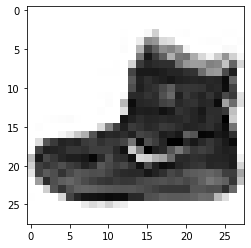

In [12]:
from matplotlib import cm
plt.imshow(X_train[0], cmap=cm.Greys)
print("Class:", isA(Y_train[0]))

On voit que l'element 0 est de la class `Ankle boot`

## 1. Test des differents algorithmes de classification

### K-nn

In [13]:
from sklearn.neighbors import KNeighborsClassifier

def executeKnn(X_train, Y_train, X_test, Y_test, k=5):
  # Re shape
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

  # Create K-nn classifier
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  t = time()
  # Train the classifier
  knn.fit(X_train, Y_train)
  print("training time: ", time() - t)

  # Test the classifier
  Y_pred = knn.predict(X_test)

  print("k = {:d} : {:.2%}".format(k, accuracy_score(Y_test, Y_pred)))

On se limite à un échantillon du dataset car le K-nn était trop lent à s'exécuter

In [14]:
nbTrain = X_train.shape[0]
print("Nb train", nbTrain)
nbTest = X_test.shape[0]
print("Nb test", nbTest)

divFactor = 8

nbTrainSample = round(nbTrain / divFactor)
print("Nb train sample", nbTrainSample)
nbTestSample = round(nbTest / divFactor)
print("Nb test sample", nbTestSample)

X_train_sample = X_train[:nbTrainSample]
Y_train_sample = Y_train[:nbTrainSample]
X_test_sample = X_test[:nbTestSample]
Y_test_sample = Y_test[:nbTestSample]

Nb train 60000
Nb test 10000
Nb train sample 7500
Nb test sample 1250


In [15]:
for k in range (1, 6):
  executeKnn(X_train_sample, Y_train_sample, X_test_sample, Y_test_sample, k)

training time:  0.5379211902618408
k = 1 : 79.28%
training time:  0.4831714630126953
k = 2 : 80.64%
training time:  0.48018860816955566
k = 3 : 80.80%
training time:  0.5131649971008301
k = 4 : 80.88%
training time:  0.5325145721435547
k = 5 : 82.24%


## 2. Comparaison des technique de reduction de dimension